In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cities_comparison(city_data_list, city_names, y_lims=None):
    """
   生成多城市 × 多任务的性能对比柱状图，按 “城市” 横向排列子图（示例中 3 个城市对应 3 列子图），形成 1 行 ×N 列的网格，
   每个子图内对比 “3 个任务”（Check-in、Crime、Service call），子图间对比 “不同城市”，横坐标统一为 “掩码记录数”。

    参数：
    city_data_list : 字典列表
        包含各城市数据的列表，每个元素是一个字典，必须包含以下键：
        - 'masked_records' : list[int] 或 list[float]，横轴刻度
        - 'check_in'       : list[float]，check-in 任务的 R² 值
        - 'crime'          : list[float]，crime 任务的 R² 值
        - 'service_call'   : list[float]，service call 任务的 R² 值
    city_names : 字符串列表，长度与city_data_list一致，每个元素为城市简称。
    y_lims : 元组或列表，控制 Y 轴范围

    配色：
    colors = ['#A1C9F4', '#B8E0A7', '#F5B5B5']
    """
    num_cities = len(city_data_list)
    masked_records = city_data_list[0]['masked_records']

    # 基础参数
    bar_width = 0.25
    r1 = np.arange(len(masked_records))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    colors = ['#A1C9F4', '#B8E0A7', '#F5B5B5']

    # 创建画布（横向排版）
    fig, axes = plt.subplots(1, num_cities, figsize=(7 * num_cities, 6))

    # 保证 axes 是列表
    if num_cities == 1:
        axes = [axes]

    # 子函数：绘制单个城市
    def plot_city_data(ax, data, city_abbr, ylim=None):
        ax.bar(r1, data['check_in'], color=colors[0], width=bar_width, edgecolor='black', linewidth=0, label='Check-in')
        ax.bar(r2, data['crime'], color=colors[1], width=bar_width, edgecolor='black', linewidth=0, label='Crime')
        ax.bar(r3, data['service_call'], color=colors[2], width=bar_width, edgecolor='black', linewidth=0, label='Service call')
        ax.set_xlabel(f'Masked Records Number ({city_abbr})', fontsize=22)
        ax.set_xticks([r + bar_width for r in range(len(data['masked_records']))])
        ax.set_xticklabels(data['masked_records'], fontsize=20)
        if ylim:
            ax.set_ylim(ylim)
        ax.tick_params(axis='both', which='major', labelsize=20)

    # 遍历城市绘制
    for i, (data, name) in enumerate(zip(city_data_list, city_names)):
        if y_lims is None:
            ylim = None
        elif isinstance(y_lims, tuple):
            ylim = y_lims
        else:
            ylim = y_lims[i]
        plot_city_data(axes[i], data, name, ylim)

    # 第一个子图设置 y 轴标签
    axes[0].set_ylabel('R$^2$', fontsize=22)

    # 公共图例
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0),
               ncol=3, fontsize=24, frameon=False, columnspacing=4)

    # 布局调整
    plt.tight_layout()
    fig.subplots_adjust(top=0.82)

    # 保存或显示
    
    plt.savefig("parameter_sensitivity_tasks_three_cities_modified.pdf", dpi=300, bbox_inches='tight')

    plt.show()


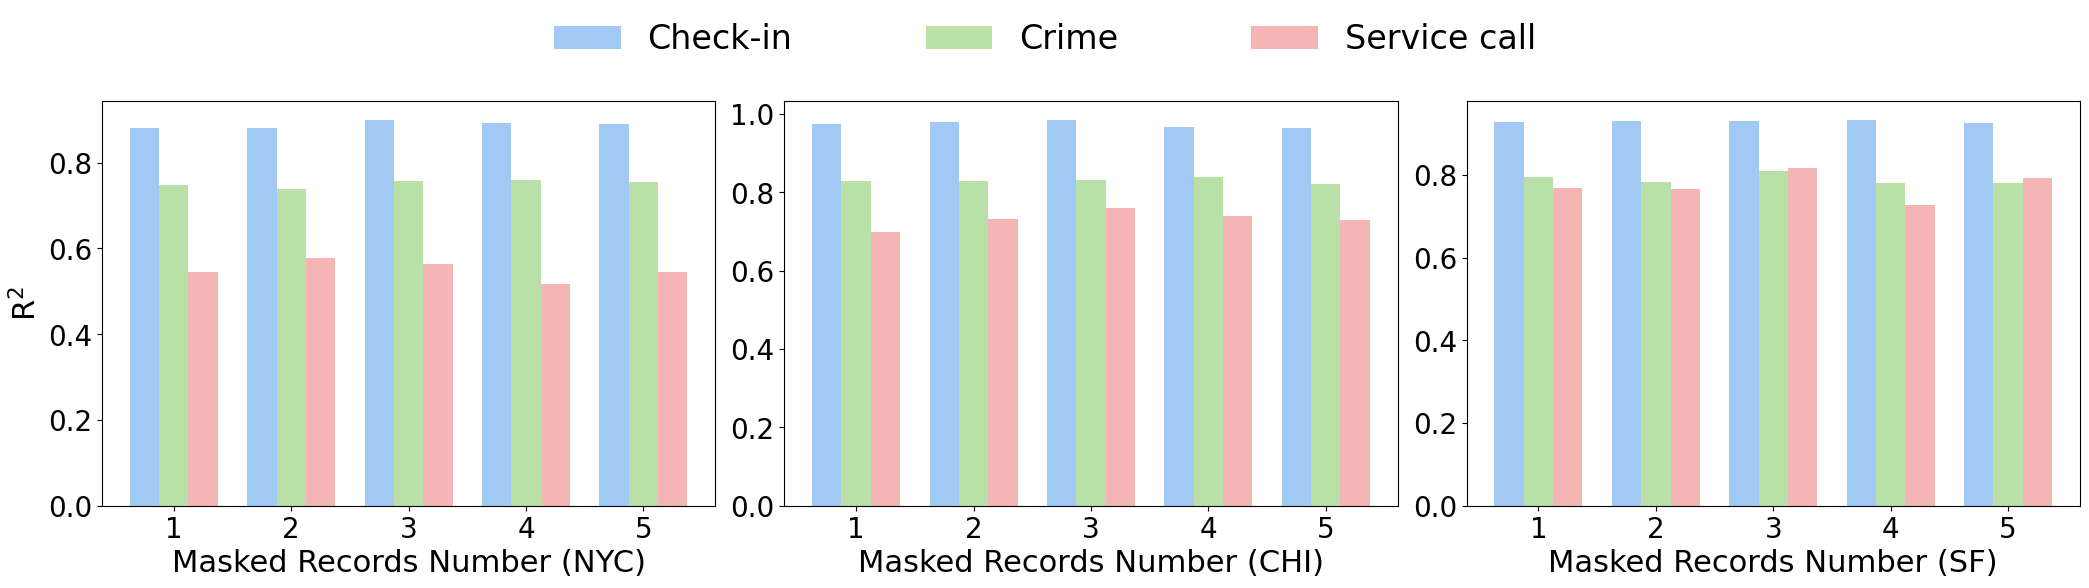

In [2]:
# ==== 示例 ====
#横坐标
masked_records = [1, 2, 3, 4, 5]
#数据
nyc_data = {
    'masked_records': masked_records,
    'check_in': [0.882, 0.88, 0.899, 0.893, 0.891],
    'crime': [0.747, 0.738, 0.757, 0.76, 0.755],
    'service_call': [0.545, 0.577, 0.564, 0.518, 0.545]
}
chi_data = {
    'masked_records': masked_records,
    'check_in': [0.975, 0.979, 0.984, 0.968, 0.963],
    'crime': [0.829, 0.828, 0.832, 0.84, 0.822],
    'service_call': [0.7, 0.732, 0.759, 0.74, 0.729]
}
sf_data = {
    'masked_records': masked_records,
    'check_in': [0.928, 0.931, 0.93, 0.932, 0.925],
    'crime': [0.795, 0.783, 0.81, 0.781, 0.78],
    'service_call': [0.769, 0.765, 0.816, 0.728, 0.792]
}
data=[nyc_data, chi_data, sf_data]

city_names=["NYC", "CHI", "SF"]
#调用
plot_cities_comparison(
    data,
    city_names
)